<a href="https://colab.research.google.com/github/Raziel-JKM/AI-python-connect/blob/master/n211a_simple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.

In [25]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
#df_t = pd.read_csv()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [26]:
# date 컬럼 전처리
df['date'] = pd.to_datetime(df['date'].str.slice(start=0,stop=8))
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화 하세요.
- **타겟과 상관관계가 가장 높은 특성의 이름을 과제 제출폼에 제출하세요.**

In [27]:
# 타겟(price)과의 상관관계
df_corr = df.loc[:,df.columns[2:]].corr(method='pearson').loc[:,['price']]
df_corr

,price
price,1.000000
bedrooms,0.308350
bathrooms,0.525138
sqft_living,0.702035
sqft_lot,0.089661
floors,0.256794
waterfront,0.266369
view,0.397293
condition,0.036362
grade,0.667434


In [28]:
#연습
#import pandas as pd
#corr = df.corr()
#print(corr)
#너무 산만한 상관관계가 나옴

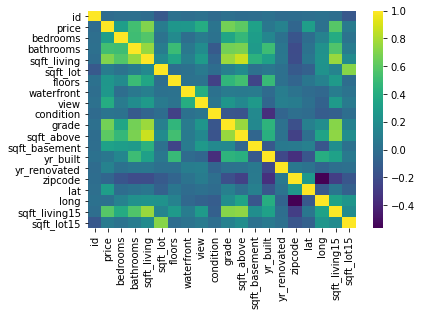

In [29]:
sns.heatmap(corr, cmap='viridis')
plt.show()

In [30]:
# 상관관계가 가장 높은 특성(Feature)
df_corr_max = df_corr.loc[:,['price']].nlargest(2,['price'])
print(f'상관관계가 가장 높은 특성은 {df_corr_max.index[1]}이다.')
df_corr_max

상관관계가 가장 높은 특성은 sqft_living이다.


,price
price,1.000000
sqft_living,0.702035


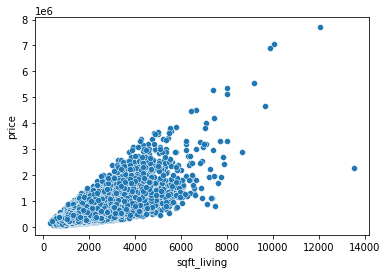

In [31]:
# 타겟(price)과 상관관계가 가장 높은 특성(Feature)과의 관계 시각화.
sns.scatterplot(x=df['sqft_living'],y=df['price'])
plt.show()

# 상관계수가 0.7로 양의 상관관계가 있다는 것을 알 수 있으며 그래프에서도 볼 수 있듯이 두 변수 간에는 양의 관계가 있는 것을 알 수 있다.

In [32]:
#연습
#가격 라인만 추출
#import numpy as np
#co = np.array(iloc(2:))

### 2) grade 와 price의 scatter plot을 그리고 기준모델을 시각화 해 보세요.
- **기준모델의 값을 과제 제출폼에 제출하세요.**

In [46]:
# 평균기준모델
predict = df['price'].mean()
error = predict - df['price']
mean_absolute_error = error.abs().mean()
print(mean_absolute_error)

233941.7242725122


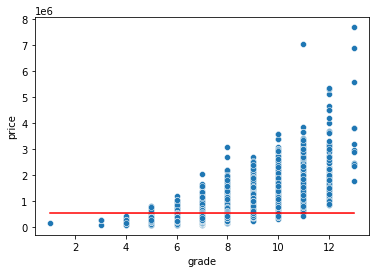


예측한 주택 가격이 $540,088이며 절대평균에러가 $233,942임을 확인할 수 있습니다.


In [33]:
# 평균기준모델
predict = df['price'].mean()
error = predict - df['price']
mean_absolute_error = error.abs().mean()

# grade와 price의 scatterplot
sns.scatterplot(x=df['grade'],y=df['price'])
sns.lineplot(x=df['grade'],y=predict,color='r')
plt.show()

print(f'\n예측한 주택 가격이 ${predict:,.0f}이며 절대평균에러가 ${mean_absolute_error:,.0f}임을 확인할 수 있습니다.')

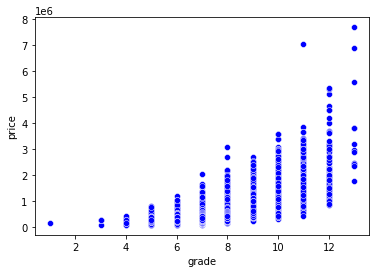

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
x = df['grade']
y = df['price']

#predict = df['SalePrice'].mean()
#errors = predict - df['SalePrice']
#mean_absolute_error = errors.abs().mean()

#sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue');

### 3) Scikit-Learn 라이브러리를 사용해 특성 grade에 대한 선형회귀모델을 만들어 보세요.
- **grade 값이 6인 경우에 모델이 예측하는 주택 가격을 과제 제출폼에 제출하세요.**

In [47]:
# 예측모델 인스턴스 만들기
model = LinearRegression()

# x특성테이블과 y타겟 벡터 만들기
X_train = df[['grade']]
y_train = df[['price']]

# 모델 학습
model.fit(X_train,y_train)

# grade값이 6 인 경우에 모델의 예측값 출력
X_test = [[6]]
y_pred = model.predict(X_test)

print(f'{X_test[0][0]} grade를 가지는 주택의 예상 가격은 ${y_pred[0][0]} 입니다.')

6 grade를 가지는 주택의 예상 가격은 $194700.3977405005 입니다.


In [35]:
## Scikit-Learn 라이브러리에서 사용할 예측모델 클래스를 Import 합니다
from sklearn.linear_model import LinearRegression

## 예측모델 인스턴스를 만듭니다
model = LinearRegression()

## X 특성들의 테이블과, y 타겟 벡터를 만듭니다
feature = ['price']
target = ['grade']
X_train = df[feature]
y_train = df[target]

## 모델을 학습(fit)합니다
model.fit(X_train, y_train)

## 새로운 데이터 한 샘플을 선택해 학습한 모델을 통해 예측해 봅니다
X_test = [[4000]]
y_pred = model.predict(X_test)

print(f'{X_test[0][0]} sqft GrLivArea를 가지는 주택의 예상 가격은 ${int(y_pred)} 입니다.')

## 전체 테스트 데이터를 모델을 통해 예측해 봅니다.
X_test = [[x] for x in df['price']]
y_pred = model.predict(X_test)


## 전체 예측값 입니다.
y_pred

4000 sqft GrLivArea를 가지는 주택의 예상 가격은 $6 입니다.


array([[6.97691325],
       [7.65241087],
       [6.88737402],
       ...,
       [7.36199818],
       [7.3575084 ],
       [7.19723531]])

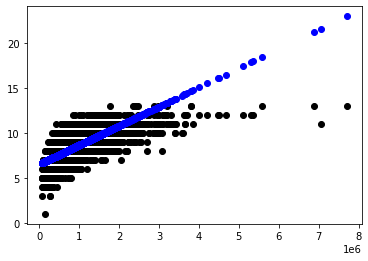

In [36]:
## train 데이터에 대한 그래프를 그려보겠습니다.
plt.scatter(X_train, y_train, color='black', linewidth=1)

## test 데이터에 대한 예측을 파란색 점으로 나타내 보겠습니다.
plt.scatter(X_test, y_pred, color='blue', linewidth=1);

### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **grade 특성에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [37]:
## 계수(coefficient)
model.coef_

array([[2.13697446e-06]])

In [38]:
## 절편(intercept)
model.intercept_

array([6.50271862])

In [39]:
def explain_prediction(sqft):
    y_pred = model.predict([[sqft]])
    pred = f"{int(sqft)} sqft 주택 가격 예측: ${int(y_pred[0])} (1 sqft당 추가금: ${int(model.coef_[0])})"

    return pred

In [40]:

## square_feet = 4000 인 테스트 데이터로 예측
print(explain_prediction(4000))

4000 sqft 주택 가격 예측: $6 (1 sqft당 추가금: $0)


### 5) sqft_living 특성을 사용하여 모델을 만들어 보고 두 모델을 비교해 보세요.
- **sqft_living에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [44]:
model1 = LinearRegression()

X_train = df[['sqft_living']]
y_train = df[['price']]

model1.fit(X_train,y_train)

print('계수:', model1.coef_[0][0])
print('절편:',model1.intercept_[0])

#interact
def explain_prediction(sqft_living=(0,12000)):
    y_pred = model1.predict([[sqft_living]])
    pred = f"{sqft_living} sqft_living 주택 가격 예측: ${y_pred[0][0]} (1 sqft_living당 추가금: ${model1.coef_[0][0]})"

    return pred

계수: 280.62356789744825
절편: -43580.74309447396


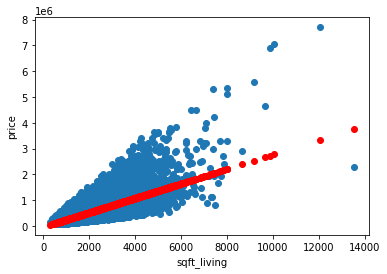

In [42]:

X_test = [[x] for x in df['sqft_living']]
y_pred = model1.predict(X_test)

plt.scatter(X_train,y_train)
plt.scatter(X_test,y_pred,color='r')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

## 🔥도전과제

### 6) 단순선형회귀모델을 만들기 위한 좋은 특성을 선택하기 위해 고려해야 하는 사항들에 대해 조사하고 서술하세요.


1. 선형성 (독립변수와 종속변수 간의 선형관계)
2. 오차항의 평균은 0 
3. 독립변수들의 사이의 선형관계가 없다.
4. 독립변수는 오차항과 상관이 없다.
5. 오차항들은 서로 독립적이며 연관성이 없다.

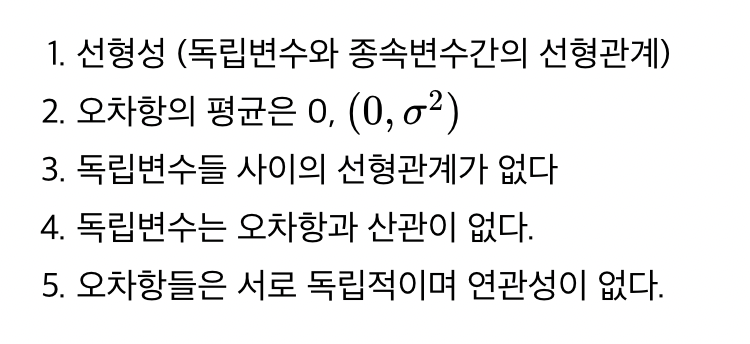


### 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 10문장 내로 요약해 보세요.

N번 측정한 측정값 y1, y2, y3, y4, ...yn이 어떤 다른 측정값x1, x2, x3, x4....xn의 함수 y=f(x)일 것으로 추정할 수 있을 때, 이를 측정값들의 관계에 가장 잘 맞는 함수 y=f(x)의 측정값 yi와 함수값 f(xi)의 차이를 제곱한 것의 합
이 최소가 되도록 함수 y=f(x)를 구하는 것이 최소자승법이다